<h1 style="color: #5e9ca0;"><span style="color: #000000;">Learning the XOR function and Visualizing the Hidden Layer output.</span></h1>
<p><span style="color: #000000;">We would be using a basic feedforward network with one hidden layer to learn the&nbsp; XOR function using numpy.</span></p>

<p>The XOR truth table is given as follows:</p>
<table style="height: 190px; width: 110px;">
<tbody>
<tr>
<td style="width: 29px;">0</td>
<td style="width: 29px;">0</td>
<td style="width: 36px;"><span style="color: #ffcc00;"><strong>1</strong></span></td>
</tr>
<tr>
<td style="width: 29px;">1</td>
<td style="width: 29px;">0</td>
<td style="width: 36px;"><span style="color: #003366;"><strong>0</strong></span></td>
</tr>
<tr>
<td style="width: 29px;">1</td>
<td style="width: 29px;">1&nbsp;</td>
<td style="width: 36px;"><span style="color: #ffcc00;"><strong>1</strong></span></td>
</tr>
<tr>
<td style="width: 29px;">0</td>
<td style="width: 29px;">1</td>
<td style="width: 36px;"><span style="color: #003366;"><strong>0</strong></span></td>
</tr>
</tbody>
</table>

In [2]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Create the training data for XOR.

data = np.array([[0,0,1],[1,0,0],[1,1,1],[0,1,0]])
print(data)

#First two columns are the inputs,3rd Column consists of the labels

[[0 0 1]
 [1 0 0]
 [1 1 1]
 [0 1 0]]


In [4]:
#Create the X_train(Co-oridinates) and Y_train(Labels) Matrices.

Y_train = data[:,2].reshape(data.shape[0],1)
X_train = data[:,:2]

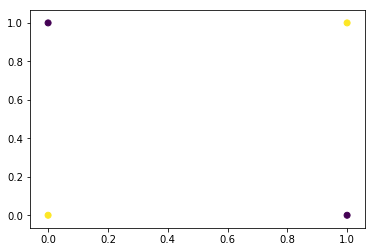

In [5]:
#Let us Visualise how the input space looks like:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)